In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

city_df = pd.read_csv('portland.csv')
print(city_df.head(3))

   Unnamed: 0             datetime  humidity  pressure  temperature  \
0           0  2012-10-01 12:00:00      81.0    1024.0   282.080000   
1           1  2012-10-01 13:00:00      81.0    1024.0   282.080000   
2           2  2012-10-01 14:00:00      80.0    1024.0   282.083252   

  weather_description  wind_direction  wind_speed  hour  day  week  month  
0    scattered clouds             0.0         0.0    12    1    40     10  
1    scattered clouds             0.0         0.0    13    1    40     10  
2    scattered clouds             4.0         0.0    14    1    40     10  


# General data summary

In [2]:
city_df.describe()

,Unnamed: 0,humidity,pressure,temperature,wind_direction,wind_speed,hour,day,week,month
count,45253.000000,45253.000000,45253.000000,45253.000000,45253.000000,45253.000000,45253.000000,45253.000000,45253.000000,45253.000000
mean,22626.000000,74.668530,1019.268314,284.992865,189.895874,2.050693,11.501337,15.725322,27.134378,6.648730
std,13063.560203,19.059956,9.942747,7.452368,102.876497,1.840820,6.922398,8.793919,15.134942,3.464906
min,0.000000,10.000000,968.000000,262.370000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,11313.000000,63.000000,1014.000000,279.850000,107.000000,1.000000,6.000000,8.000000,14.000000,4.000000
50%,22626.000000,80.000000,1019.000000,284.320000,198.000000,1.000000,12.000000,16.000000,27.000000,7.000000
75%,33939.000000,90.000000,1025.000000,289.450000,289.000000,3.000000,18.000000,23.000000,41.000000,10.000000
max,45252.000000,100.000000,1056.000000,312.520000,360.000000,17.000000,23.000000,31.000000,53.000000,12.000000


# Average values experienced each month


In [3]:
monthly_group = pd.DataFrame(city_df.groupby('month').mean())
print(monthly_group)

monthly_group.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

def perform_analysis(feature):
    """Performs monthly analysis and plotting"""
    
    mean_value = monthly_group[feature].mean()
    maximum_value = monthly_group[feature].max()
    minimum_value = monthly_group[feature].min()
    ten_percent = maximum_value/100

    print(f'Mean {feature} is: {mean_value}')
    print(f'Maximum {feature} is: {maximum_value}')
    print(f'Minimum {feature} is: {minimum_value}')
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    # To zoom into the plot
    ax.set(ylim=[minimum_value - ten_percent,
                 maximum_value + ten_percent])
         
    ax.bar((monthly_group.index), (monthly_group[feature]))
    plt.title(f'{feature} variation chart'.title())
    plt.xticks((monthly_group.index))
    plt.show()

         Unnamed: 0   humidity     pressure  temperature  wind_direction  \
month                                                                      
1      20092.300000  82.468011  1023.320161   276.733184      144.043548   
2      20864.861702  81.965426  1020.283983   279.159428      140.232565   
3      21513.100000  77.656452  1020.979839   281.697859      157.061022   
4      22245.100000  72.137222  1021.607500   283.817127      179.512778   
5      22977.100000  67.754301  1019.889247   287.715237      216.709946   
6      23709.100000  66.418333  1019.247500   290.503580      233.772222   
7      24441.100000  61.631720  1015.582527   293.474855      259.011559   
8      25185.100000  62.614516  1016.339785   293.933623      243.252151   
9      25917.100000  70.093611  1017.559444   289.985510      203.681944   
10     22327.537736  82.230009  1016.433064   284.827806      171.882300   
11     22880.327670  82.759367  1019.728648   281.231417      163.667908   
12     19348

### Humidity

Mean humidity is: 74.45360129128069
Maximum humidity is: 85.71424731182796
Minimum humidity is: 61.63172043010753


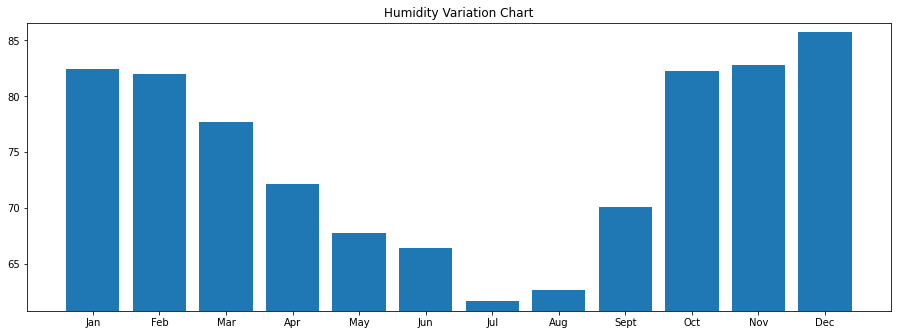

In [4]:
perform_analysis('humidity')

### Pressure

Mean pressure is: 1019.3181388719278
Maximum pressure is: 1023.3201612903226
Minimum pressure is: 1015.5825268817205


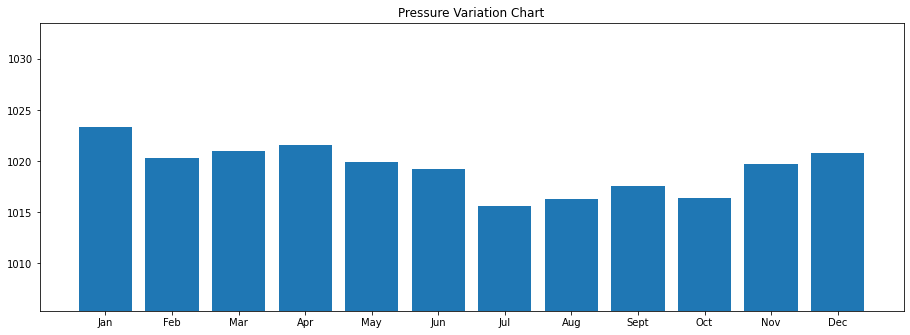

In [6]:
perform_analysis('pressure')

### Temperature

### Note the inverse correlation between temperature and humidty

Mean temperature is: 285.0253571636489
Maximum temperature is: 293.93362315418335
Minimum temperature is: 276.7331841650836


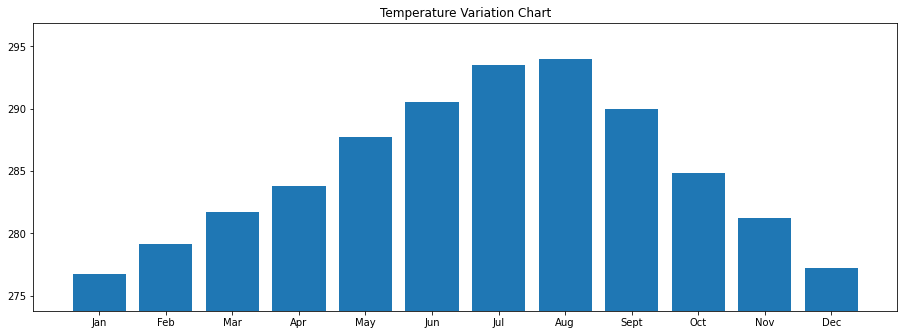

In [7]:
perform_analysis('temperature')

### Wind Direction

Mean wind_direction is: 190.28355619817003
Maximum wind_direction is: 259.01155913978494
Minimum wind_direction is: 140.23256501182033


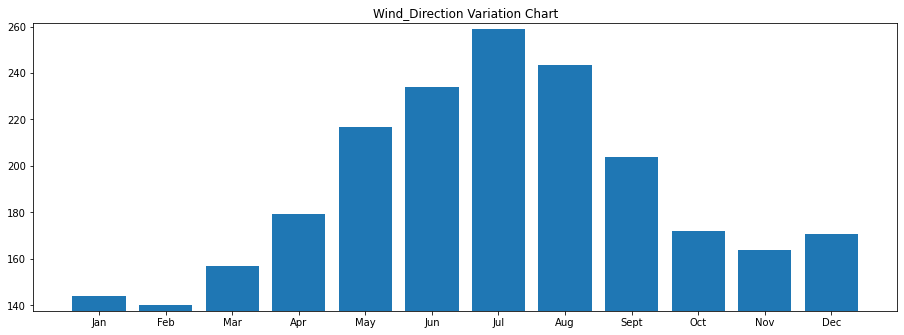

In [8]:
perform_analysis('wind_direction')

### Wind Speed

Mean wind_speed is: 2.0481674437922286
Maximum wind_speed is: 2.6530137305096577
Minimum wind_speed is: 1.4369444444444444


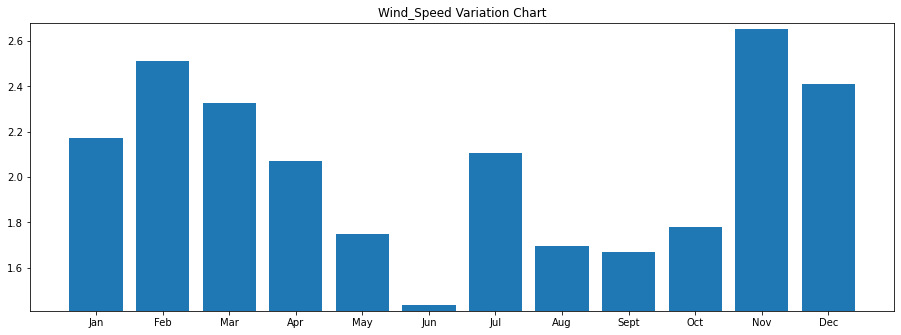

In [9]:
perform_analysis('wind_speed')

## Most experienced weather condition was a clear sky

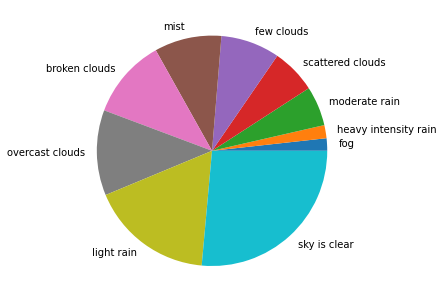

In [10]:
weather_description = city_df.groupby(['weather_description']).size()

weather_dict = {condition:count for condition, count in weather_description.iteritems()}
   

top_weathers = list(sorted(weather_dict.items(), key=lambda item: item[1]))[-10:]

top_weathers = dict(top_weathers)
#print(top_weathers)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(top_weathers.values(), labels=top_weathers.keys())
plt.show()